In [10]:
import pandas as pd
import numpy as np

# stopwords

In [86]:
stop='a is of this the'.split()
def remo(st,txt):
    new=' '.join([word for word in txt.split() if word not in st])
    return new
remo(stop,'kanday is the best of the so far this time a bullshit')

'kanday best so far time bullshit'

In [96]:
from nltk.corpus import stopwords
stops=stopwords.words('English')
print(len(stops))
remo(stops,'oh my shit is this asdasd asd is a the of bully ma  won'' '  )

179


'oh shit asdasd asd bully'

In [368]:
a=nltk.corpus.names.words('female.txt')
a

5001


In [742]:
#n=pd.read_csv('d:/nm.csv')
m=pd.read_csv('d:/nm1.csv')
#n.head()
m.head()

,Name,gender1
0,asil,male
1,akhmat,male
2,aldayar,male
3,aristan,male
4,artur,male


In [672]:
n.head()

,Name,gender1
0,Adel,female
1,Adinai,female
2,Aida,female
3,Aidai,female
4,Aidana,female


In [484]:
# new data frame with split value columns 
new = n["name"].str.split(" ", n = 1, expand = True) 
  
# making seperate first name column from new data frame 
n["First"]= new[0] 
  
# making seperate last name column from new data frame 
n["Name"]= new[1] 
#n['gender']=new[2]  
# Dropping old Name columns 
#n.drop(columns =["name"], inplace = True) 
  
# df display 
n['gender1']=n['gender']
n=n.drop(['name','gender','First'],axis=1)
n.head()

,Name,gender1
0,Adel,female
1,Adinai,female
2,Aida,female
3,Aidai,female
4,Aidana,female


In [823]:
df=pd.concat([n,m], ignore_index=True)
df.head()

,Name,gender1
0,Adel,female
1,Adinai,female
2,Aida,female
3,Aidai,female
4,Aidana,female


In [763]:
print("female {} out of {} .".format(len(df[df['gender1'] == 'female']), len(df['gender1'])))

female 156 out of 441 .


In [764]:
df['gender1'].unique()

array(['female', 'male'], dtype=object)

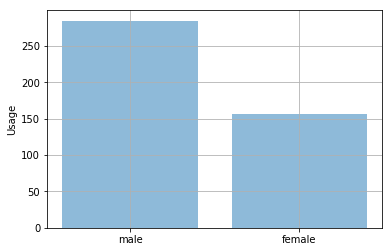

In [762]:
a=[]
for i in df['gender1']:
    if i=='female':
        a.append(i)
b=[]
for j in df['gender1']:
    if j=='male':
        b.append(j)
#print(len(b))
objects = ('male','female')
y_pos = np.arange(len(objects))
performance = [len(b),len(a)]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Usage')

plt.grid()
plt.show()

In [824]:
df=df.dropna()
df.isnull().sum()
len(df)

441

In [807]:
#dup=df['Name'].duplicated()
#dup = df.duplicated(['Name'])
#dup

In [826]:
df=df.drop_duplicates(keep='first', inplace=False)
len(df)

370

In [698]:
df.to_csv('d:/df.csv', index = False)


In [617]:
a=[('AsAn','male'),('argen','male'),('aibek','male'),('asel','female'),('aigul','female')]
type(a[0])
a

[('AsAn', 'male'),
 ('argen', 'male'),
 ('aibek', 'male'),
 ('asel', 'female'),
 ('aigul', 'female')]

In [830]:
df.tail()

,Name,gender1
442,gulmayram,female
443,boldukiz,female
444,cholpon,female
445,ayana,female
446,ayima,female


In [840]:
nams=[name for name in dfe]
#w=[('asdasASDASd','jklLK')]
#print(nams)
#for i,j in nams:
    #print(i.lower())


In [841]:
nams=[name for name in dfe]
#names +=[(name,'female') for name in nltk.corpus.names.words('female.txt')]


def extract_gender_features(name):
    name=name.lower()
    features={}
    features['suffix']=name[-1:]
    features['suffix2']=name[-2:] if len(name)> 1 else name[0]
    features['suffix3']=name[-3:] if len(name)> 2 else name[0]
    features['prefix']=name[:1]
    features['prefix1']=name[:2] if len(name)> 1 else name[0]
    features['prefix2']=name[:3] if len(name)> 2 else name[0]
    features['prefix3']=name[:4] if len(name)> 3 else name[0]
    return features

data=[(extract_gender_features(name),gender)for (name,gender) in nams]
import random
random.shuffle(data)
datacount=len(data)
traincount=int(.8*datacount)

traindata=data[:traincount]
testdata=data[traincount:]

#NLTK NAIVE
bayes=nltk.NaiveBayesClassifier.train(traindata)

#Classifier

def classify(name):
    label=bayes.classify(extract_gender_features(name))
    print('name',name,'clssified as:',label)
print('train_accu:',nltk.classify.accuracy(bayes,traindata))
print('test_accu:',nltk.classify.accuracy(bayes,testdata))

classify('kanybek')

bayes.show_most_informative_features(10)


train_accu: 0.9898648648648649
test_accu: 0.8648648648648649
name kanybek clssified as: male
Most Informative Features
                  suffix = 'a'            female : male   =     19.4 : 1.0
                  suffix = 'k'              male : female =     17.3 : 1.0
                 suffix2 = 'ra'           female : male   =     10.7 : 1.0
                 prefix1 = 'ai'           female : male   =      6.9 : 1.0
                 suffix2 = 'ul'           female : male   =      5.8 : 1.0
                 suffix2 = 'al'           female : male   =      5.6 : 1.0
                 suffix3 = 'mat'            male : female =      4.9 : 1.0
                 prefix1 = 'da'             male : female =      4.2 : 1.0
                  suffix = ' '              male : female =      3.9 : 1.0
                 prefix1 = 'er'             male : female =      3.7 : 1.0


In [884]:
classify('kanybek')
classify('Alik')
classify('Asan')
classify('Azamat')
classify('Bakyt')
classify('Chyngyz')
classify('Emil')
classify('Nurdeen')
classify('Usen')
classify('erkebai')
print(" ")
print(" ")
classify('Aziza')
classify('Azem')
classify('Baktigul')
classify('Begaiym')
classify('Begimai')
classify('Cholpol')
classify('Dariga')
classify('Dilara')
classify('Eldana')
classify('Dinara')
classify('ailin')
classify('azem')
print(" ")
print(" ")
classify('musa')
classify('nurlan')
classify('daniyar')
classify('nurzamat')
classify('dilsad')
classify('osman')
classify('joodar')
classify('hikmet')
classify('bakyt')
classify('ulan')
classify('kylych')
classify('samagan')
classify('aikokulbek')


    

name kanybek clssified as: male
name Alik clssified as: male
name Asan clssified as: male
name Azamat clssified as: male
name Bakyt clssified as: male
name Chyngyz clssified as: female
name Emil clssified as: male
name Nurdeen clssified as: male
name Usen clssified as: male
name erkebai clssified as: male
 
 
name Aziza clssified as: female
name Azem clssified as: female
name Baktigul clssified as: female
name Begaiym clssified as: female
name Begimai clssified as: female
name Cholpol clssified as: female
name Dariga clssified as: female
name Dilara clssified as: female
name Eldana clssified as: female
name Dinara clssified as: female
name ailin clssified as: female
name azem clssified as: female
 
 
name musa clssified as: female
name nurlan clssified as: male
name daniyar clssified as: male
name nurzamat clssified as: male
name dilsad clssified as: male
name osman clssified as: male
name joodar clssified as: male
name hikmet clssified as: female
name bakyt clssified as: male
name ula

In [845]:
err=[]
for(name,label) in nams:
    if bayes.classify(extract_gender_features(name))!=label:
        err.append({'name:':name,"Actua_label:":label,'classified as not':label})
err

[{'Actua_label:': 'female', 'classified as not': 'female', 'name:': 'Keres'},
 {'Actua_label:': 'male', 'classified as not': 'male', 'name:': 'Kylych'},
 {'Actua_label:': 'male', 'classified as not': 'male', 'name:': 'ergesh'},
 {'Actua_label:': 'male', 'classified as not': 'male', 'name:': 'Ahmet Hamza'},
 {'Actua_label:': 'male', 'classified as not': 'male', 'name:': 'Ahmet Kerim'},
 {'Actua_label:': 'male', 'classified as not': 'male', 'name:': 'Akinmyrza'},
 {'Actua_label:': 'male', 'classified as not': 'male', 'name:': 'Chyngyz'},
 {'Actua_label:': 'female', 'classified as not': 'female', 'name:': 'Murok'},
 {'Actua_label:': 'male', 'classified as not': 'male', 'name:': 'Kadyrbai'},
 {'Actua_label:': 'male', 'classified as not': 'male', 'name:': 'Allah'},
 {'Actua_label:': 'female', 'classified as not': 'female', 'name:': 'Samagan'},
 {'Actua_label:': 'female', 'classified as not': 'female', 'name:': 'zhibek'},
 {'Actua_label:': 'female',
  'classified as not': 'female',
  'name:'

In [893]:
#nams=[name for name in dfe]
#w=[('asdasASDASd','jklLK')]
#print(nams)
l=[]
for i in dfe:
    if 'KAN'.lower() in i[0].lower():
        l.append(i[0])
print(l)

['Kanykei', 'kanybek', 'Iskanderbek', 'Kanat', 'Aikan', 'kanyshai', 'asylkan']
